## Data Preparation
This file is created to generate essential data for implementing the demand response algorithm.
The data includes:
+ import from the grid
+ deferrable but non-flexible appliances (dishwasher + washing machine)
+ PV generation + PV forecast (weather forecast)

    PV forecast is used for the demand response, while PV generation is introduces for comparison
+ EV profile
+ Dynamic price

All the data have a resolution of 15 minutes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**household electricity consumption**

the household profile contains the total import, deferrable appliances (dishwasher and washingmachine), and pv generation. The data starts at *2016-05-01 12:00* till *2016-05-02 12:00*. I couldn't find any recent dataset where all these types of data are available thus choosing a relatively old one.

In [2]:
dishwasher = np.array([
    0.001, 0, 0.001, 0.001, 0.017, 0.319, 0.131, 0.225, 0.315, 0.002,
    0.001, 0.001, 0.001, 0, 0.001, 0.001, 0, 0.001, 0.001, 0, 
    0.001, 0.001, 0.001, 0, 0.001, 0.001, 0, 0.001, 0.001, 0, 
    0.218, 0.189, 0.299, 0.176, 0.35, 0.028, 0.002, 0.001, 0, 0.001, 
    0.001, 0, 0.001, 0, 0.001, 0, 0.001, 0, 0.001, 0.001, 0.001, 
    0, 0.001, 0.001, 0, 0.001, 0.001, 0, 0.001, 0.001, 0, 0.001, 
    0.001, 0, 0.001, 0.001, 0, 0.001, 0, 0.001, 0.001, 0.001, 0.001, 
    0, 0.001, 0.001, 0, 0.001, 0.001, 0, 0.001, 0, 0.001, 0.001, 
    0, 0.001, 0.001, 0, 0.001, 0.001, 0, 0.001, 0.001, 0, 0.001, 
    0.001
])

In [3]:
grid_import = np.array([
    0.294, 0.063, 0.048, 0.025, 0.065, 0.345, 0.135, 0.239, 0.441, 0.061,
    0.003, 0, 0, 0, 0.055, 0.126, 0.027, 0.042, 0.031, 0, 
    0.067, 0.105, 0.419, 0.763, 0.432, 0.388, 0.253, 0.546, 0.277, 0.17,
    0.402, 0.423, 0.549, 0.485, 0.65, 0.318, 0.222, 0.221, 0.251, 0.34,
    0.362, 0.349, 0.35, 0.36, 0.332, 0.262, 0.241, 0.175, 0.169, 0.186,
    0.222, 0.193, 0.113, 0.109, 0.1, 0.108, 0.112, 0.141, 0.136, 0.114,
    0.119, 0.111, 0.1, 0.117, 0.13, 0.103, 0.09, 0.092, 0.087, 0.09,
    0.097, 0.104, 0.071, 0.254, 0.437, 0.093, 0, 0, 0.06, 0, 0, 0,
    0.09, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
])

In [4]:
# critical load i.e. load that can not be manipulated
# critical load is calculated as: grid_import + pv_generation - grid_export - the rest of the load
critical = np.array([
    0.193, 0.102, 0.091, 0.099, 0.11, 0.096, 0.068, 0.071, 0.152, 0.151,
    0.142, 0.133, 0.135, 0.135, 0.126, 0.257, 0.164, 0.139, 0.135, 0.142,
    0.143, 0.145, 0.433, 0.773, 0.473, 0.45, 0.292, 0.535, 0.257, 0.115,
    0.152, 0.205, 0.219, 0.281, 0.276, 0.259, 0.178, 0.189, 0.23, 0.309,
    0.331, 0.321, 0.308, 0.307, 0.297, 0.256, 0.237, 0.172, 0.158, 0.155,
    0.168, 0.15, 0.087, 0.09, 0.083, 0.09, 0.08, 0.089, 0.089, 0.085,
    0.091, 0.086, 0.082, 0.091, 0.084, 0.066, 0.063, 0.063, 0.056, 0.061,
    0.063, 0.06, 0.044, 0.272, 0.465, 0.134, 0.036, 0.024, 0.077, 0.018,
    0.031, 0.028, 0.174, 0.034, 0.028, 0.044, 0.029, 0.03, 0.021, 0.027,
    0.032, 0.027, 0.024, 0.031, 0.023, 0.042
])

In [5]:
pv = np.array([
    0.089, 0.11, 0.111, 0.098, 0.08, 0.089, 0.092, 0.102, 0.08, 0.134,
    0.236, 0.395, 0.39, 0.403, 0.144, 0.232, 0.212, 0.116, 0.141, 0.209,
    0.114, 0.083, 0.068, 0.043, 0.059, 0.08, 0.061, 0.019, 0.024, 0.0,
    0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.01, 0.036, 0.051, 0.08, 0.078, 0.089, 0.1, 0.109, 
    0.131, 0.145, 0.18, 0.245, 0.345, 0.458, 0.547, 0.468, 0.372, 0.245, 
    0.201, 0.274, 0.33, 0.263, 0.223, 0.33
])

In [13]:
wm = np.array([
    0.374, 0.146, 0.019, 0.025, 0.004, 0.001, 0.001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0.001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
])

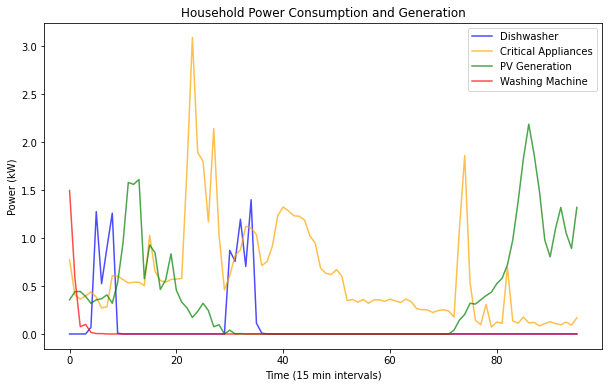

In [14]:
### Visualize the household consumption and generation
def plot_household(dishwasher, critical, pv, wm):
    plt.figure(figsize=(10, 6))
    plt.plot(dishwasher*4, label='Dishwasher', color='blue', alpha=0.7)
    plt.plot(critical*4, label='Critical Appliances', color='orange', alpha=0.7)
    plt.plot(pv*4, label='PV Generation', color='green', alpha=0.7)
    plt.plot(wm*4, label='Washing Machine', color='red', alpha=0.7)
    plt.legend()
    plt.xlabel('Time (15 min intervals)')
    plt.ylabel('Power (kW)')
    plt.title('Household Power Consumption and Generation')
    plt.show()

plot_household(dishwasher, critical, pv, wm)

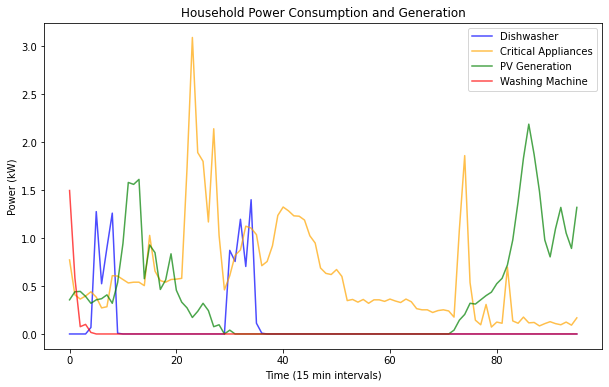

In [15]:
# force the data which is smaller than 0.002 to be 0
dishwasher[dishwasher < 0.002] = 0
critical[critical < 0.002] = 0
pv[pv < 0.002] = 0
wm[wm < 0.002] = 0

# # The profile of dishwasher has a very bizzarre timestamp at index=66 where the power is 0.04 kW but there is apparently no
# # operation around that timestamp. So it is replaced with 0.
# dishwasher[66] = 0

plot_household(dishwasher, critical, pv, wm)

**Dynamic Price**

In ENTSO-E platform it seems that 2016 is a bit too early as there is no relevant data at all. Therefore, the German energy price from 2019-05-01 12:00 to 2019-05-02 12:00 is adopted.

In [9]:
dynamic_price = np.array([
    21.12, 21.12, 21.12, 21.12, 4.90, 4.90, 4.90, 4.90,
    -2.46, -2.46, -2.46, -2.46, -2.82, -2.82, -2.82, -2.82,
    1.98, 1.98, 1.98, 1.98, 19.61, 19.61, 19.61, 19.61,
    29.65, 29.65, 29.65, 29.65, 34.51, 34.51, 34.51, 34.51,
    37.25, 37.25, 37.25, 37.25, 33.20, 33.20, 33.20, 33.20,
    35.18, 35.18, 35.18, 35.18, 29.96, 29.96, 29.96, 29.96,
    31.18, 31.18, 31.18, 31.18, 27.67, 27.67, 27.67, 27.67,
    27.21, 27.21, 27.21, 27.21, 25.71, 25.71, 25.71, 25.71,
    26.97, 26.97, 26.97, 26.97, 31.93, 31.93, 31.93, 31.93,
    41.75, 41.75, 41.75, 41.75, 45.52, 45.52, 45.52, 45.52,
    47.18, 47.18, 47.18, 47.18, 43.30, 43.30, 43.30, 43.30,
    39.70, 39.70, 39.70, 39.70, 37.32, 37.32, 37.32, 37.32
])

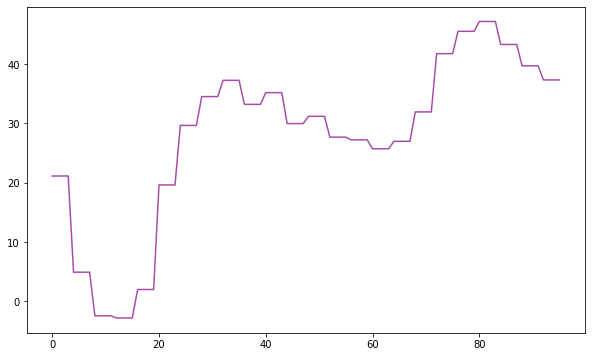

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(dynamic_price, label='Dynamic Price', color='purple', alpha=0.7)

**EV Profile**

Can we directly borrow the setting from the paper "Automated Demand Response"?

The setting then would be: a 4-kW smart EV charger which should be controlled to fill the daily depleted energy of 6 kWh during the interval from the 18:00 til 10:00 (next day).

TODO: Still need to determine the power of EV discharging its energy back to the grid.

**PV Forecast**
Open Power System has weather dataset which contains the hourly solar radiation. The total amount of radiation is calculated by adding *radiation_direct* with *radiation_diffusion*. However, efforts have to be made to build connection between radiation and power generation of PV. Therefore, for the moment the prediction is generated by imposing random noise on the real generation, we could improve the prediction using our weather data later.

Text(0, 0.5, 'Power (kW)')

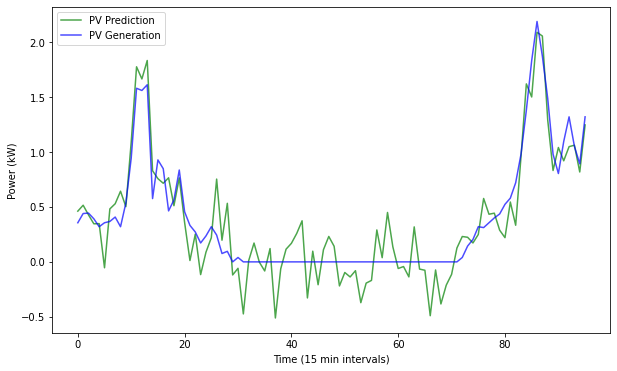

In [11]:
pv_pred = pv + np.random.normal(0, 0.05, len(pv))

plt.figure(figsize=(10, 6))
plt.plot(pv_pred*4, label='PV Prediction', color='green', alpha=0.7)
plt.plot(pv*4, label='PV Generation', color='blue', alpha=0.7)
plt.legend()
plt.xlabel('Time (15 min intervals)')
plt.ylabel('Power (kW)')

**package the data**

In [16]:

# Create a DataFrame with all the data
data_synth = {
    'Dishwasher': dishwasher,
    'Critical appliances': critical,
    'PV': pv,
    'PV Prediction': pv_pred,
    'Washing Machine': wm,
    'Dynamic Price': dynamic_price,
}

# Create a timestamp index (assuming 15-minute intervals)
timestamps = pd.date_range(start='2016-05-01 12:00', periods=len(dishwasher), freq='15T')
df = pd.DataFrame(data_synth, index=timestamps)
print(df)
# Save to CSV
df.to_csv('./household_dummy_data.csv')

                     Dishwasher  Critical appliances     PV  PV Prediction  \
2016-05-01 12:00:00       0.000                0.193  0.089       0.115393   
2016-05-01 12:15:00       0.000                0.102  0.110       0.128901   
2016-05-01 12:30:00       0.000                0.091  0.111       0.106919   
2016-05-01 12:45:00       0.000                0.099  0.098       0.086608   
2016-05-01 13:00:00       0.017                0.110  0.080       0.087015   
...                         ...                  ...    ...            ...   
2016-05-02 10:45:00       0.000                0.027  0.274       0.229960   
2016-05-02 11:00:00       0.000                0.024  0.330       0.262145   
2016-05-02 11:15:00       0.000                0.031  0.263       0.265445   
2016-05-02 11:30:00       0.000                0.023  0.223       0.204543   
2016-05-02 11:45:00       0.000                0.042  0.330       0.311595   

                     Washing Machine  Dynamic Price  
2016-05-0